# Red wine data analysis:

We will be studying the dataset of red wine. Cleaning, studying and manipulating it to find out which input feature(s) [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol] best give us an idea of what the output feature(quality) would be like. 

importing the necassary python packages 

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
winedata=pd.read_excel('Red_wine.xlsx')

In [3]:
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:
winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [5]:
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [6]:
winedata.shape

(1599, 12)

# Data Cleaning and Pre-processing

Getting rid of null values and duplicates making sure the dataset is ready for manipulation

In [7]:
winedata.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [8]:
null_mask = winedata.isnull().any(axis=1)
null_rows = winedata[null_mask]

print(null_rows)

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
9              7.5              0.50         0.36             6.1      0.071   
123            8.0              0.71         0.00             2.6      0.080   
184            6.7              0.62         0.21             1.9      0.079   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
9                   17.0                   NaN   0.9978  3.35       0.80   
123                 11.0                  34.0   0.9976  3.44       0.53   
184                  8.0                  62.0   0.9970   NaN       0.58   

     alcohol  quality  
9       10.5      5.0  
123      9.5      NaN  
184      9.3      6.0  


There are 3 null values in the 9th(total sulfur dioxide) 123rd(quality) and 184th(pH) rows 

In [9]:
winedata.dropna(inplace = True)

In [10]:
winedata.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
winedata.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1596, dtype: bool

In [12]:
winedata.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.52,0.82,9.5,6.0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


# Finding out more about our output feature (QUALITY)

In [13]:
winedata['quality'].value_counts()

5.0    679
6.0    637
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

Good quality wine being grade 7 = 199 and grade 8= 18

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

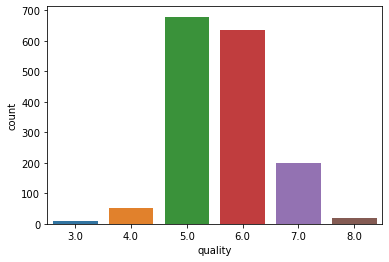

In [14]:
sns.countplot(winedata['quality'])

# Plotting the different features with our output feature (quality) with each column with quality as the x axis, to see if there is some positive or negative relationship visually 

In [15]:
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

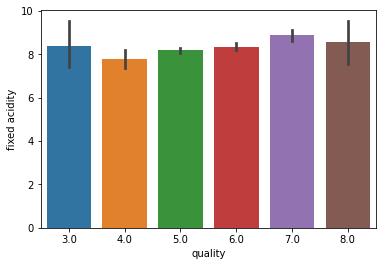

In [16]:
 sns.barplot(x='quality', y ='fixed acidity', data=winedata)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

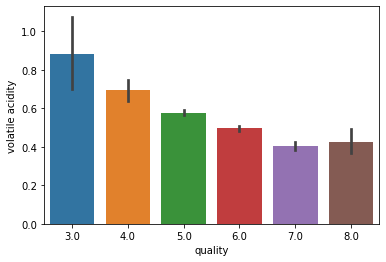

In [17]:
 sns.barplot(x='quality', y ='volatile acidity', data=winedata)

# Volatile acidity shows a negative correlation 

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

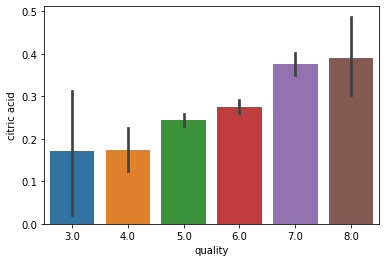

In [18]:
 sns.barplot(x='quality', y ='citric acid', data=winedata)

# Citric acid shows a positive correlation

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

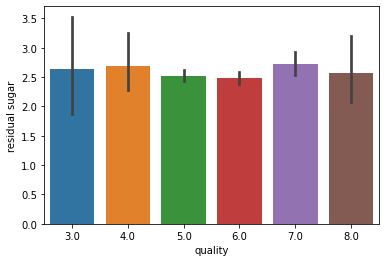

In [19]:
 sns.barplot(x='quality', y ='residual sugar', data=winedata)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

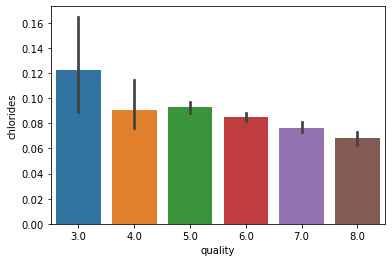

In [20]:
 sns.barplot(x='quality', y ='chlorides', data=winedata)

# Chlorides shows a negative correlation

<AxesSubplot:xlabel='quality', ylabel='density'>

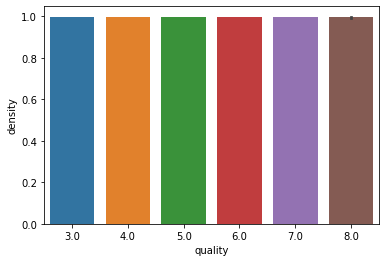

In [21]:
 sns.barplot(x='quality', y ='density', data=winedata)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

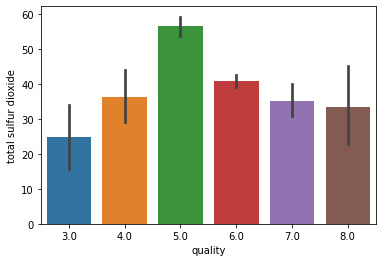

In [22]:
 sns.barplot(x='quality', y ='total sulfur dioxide', data=winedata)

<AxesSubplot:xlabel='quality', ylabel='pH'>

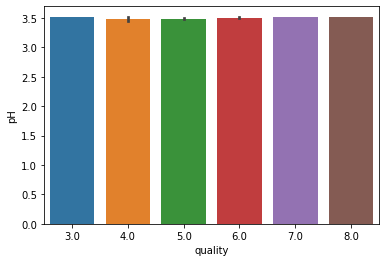

In [23]:
 sns.barplot(x='quality', y ='pH', data=winedata)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

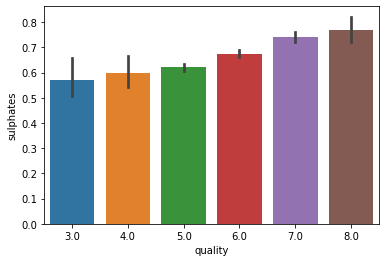

In [24]:
 sns.barplot(x='quality', y ='sulphates', data=winedata)

# Sulphates shows a positive correlation

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

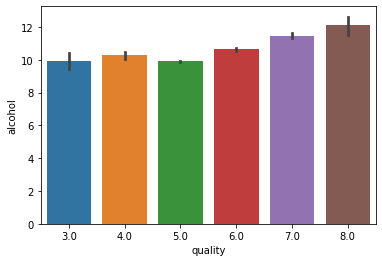

In [25]:
 sns.barplot(x='quality', y ='alcohol', data=winedata)

# Alcohol content shows a positive correlation

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

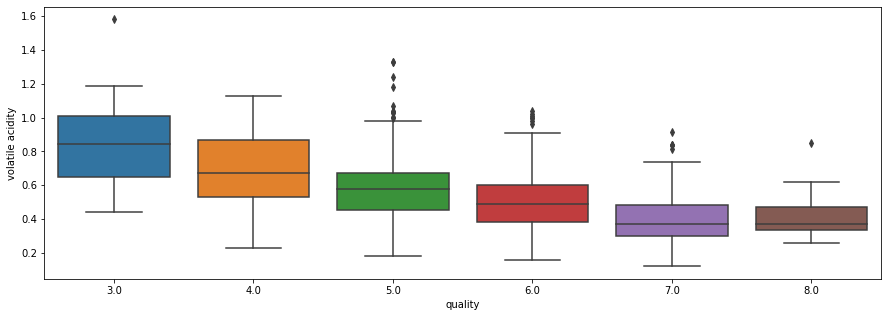

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(x="quality", y="volatile acidity",   data=winedata )

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

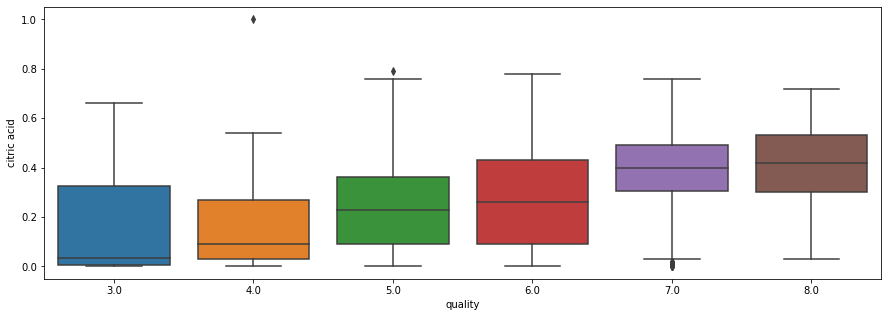

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(x="quality", y="citric acid",   data=winedata )

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

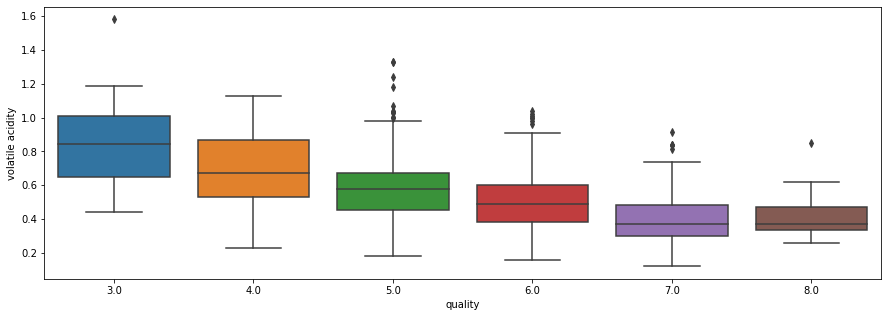

In [28]:
plt.figure(figsize=(15,5))
sns.boxplot(x="quality", y="volatile acidity",   data=winedata )

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

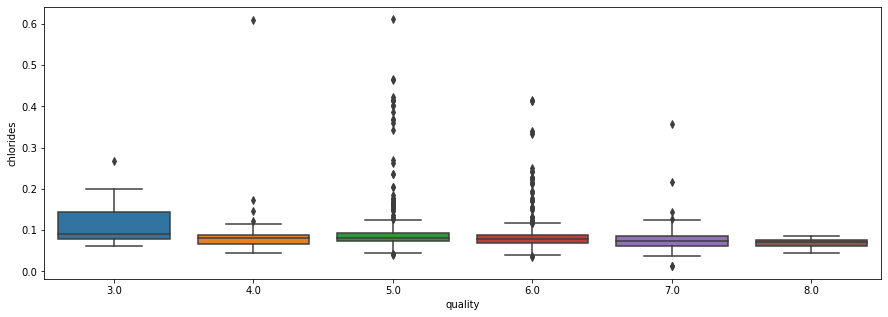

In [29]:
plt.figure(figsize=(15,5))
sns.boxplot(x="quality", y="chlorides",   data=winedata )

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

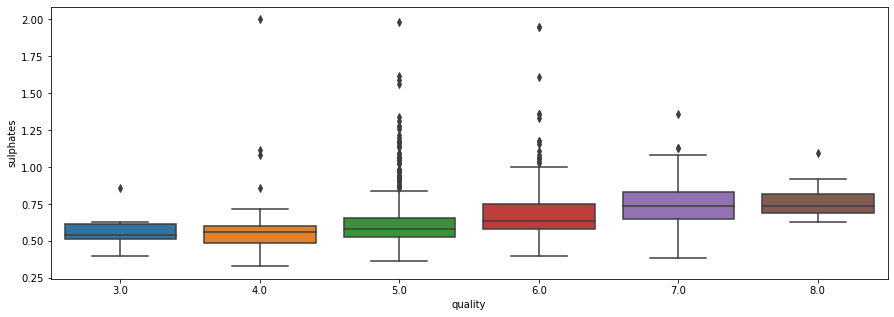

In [30]:
plt.figure(figsize=(15,5))
sns.boxplot(x="quality", y="sulphates",   data=winedata )

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

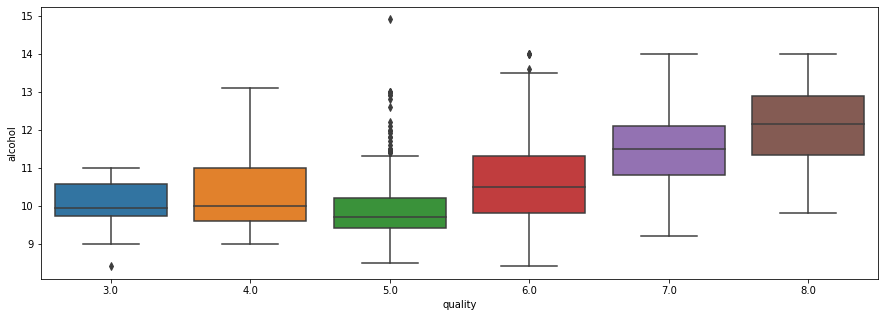

In [31]:
plt.figure(figsize=(15,5))
sns.boxplot(x="quality", y="alcohol",   data=winedata )

# Correlation Matrix

<AxesSubplot:>

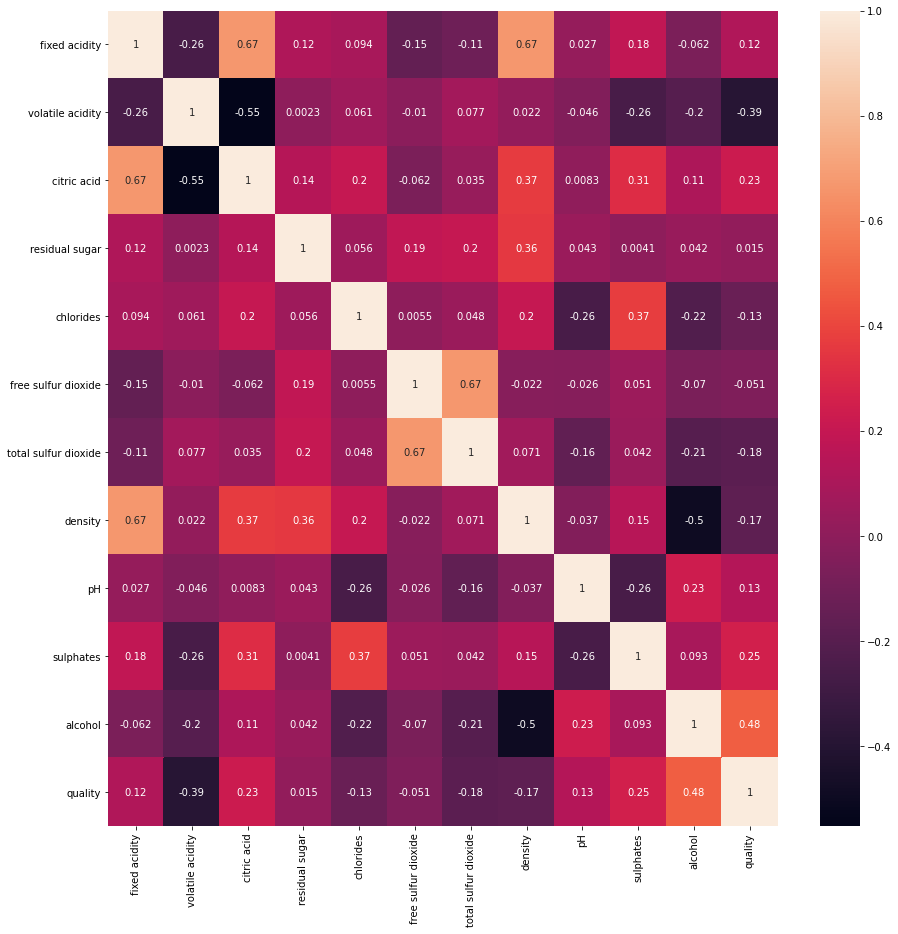

In [32]:
corrmatrix= winedata.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrmatrix,annot=True)

Volatile acidity has a negative correlation coefficient of -0.39 with quality (our output feature)

Chlorides have a negative correlation coefficient of -0.13 with quality (our output feature)

Citric acid has a positive correlation coefficient of 0.23 with quality (our output feature)

Sulphates have a positive correlation coefficient of 0.25 with quality (our output feature)

alcohol level has a positive correlation coefficient of 0.48 with quality (our output feature)

# Narrowing it down

Narrowing it down to volatile acidity and alcohol level as an indicator of good or bad quality wine (as they have higher correlation values than the other features)

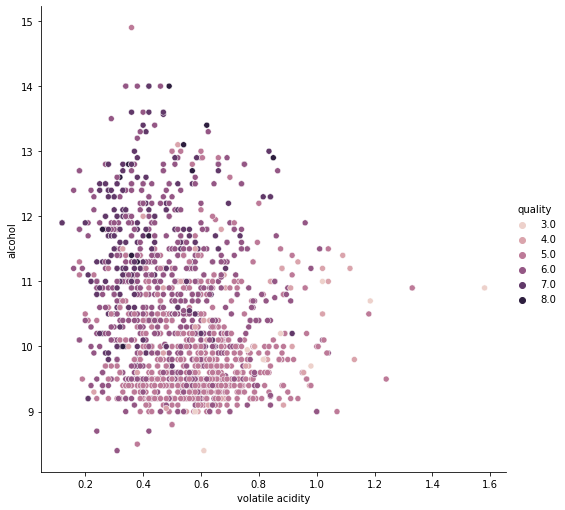

In [33]:
#visualization using seaborn - pairplot
sns.relplot(x = "volatile acidity",y="alcohol",
             height=7,data=winedata, hue='quality')
plt.show()

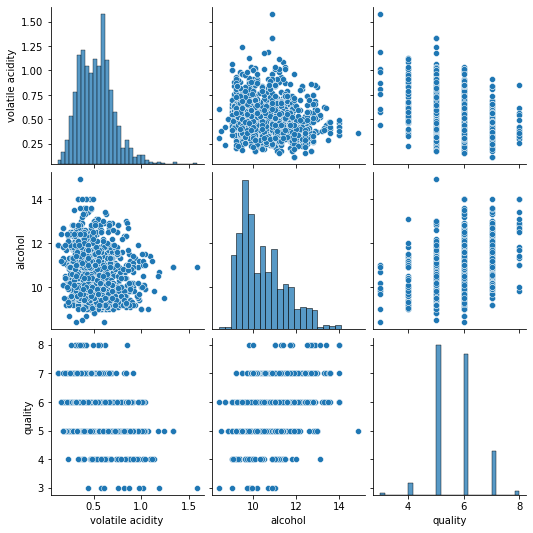

In [34]:
sns.pairplot(data= winedata,vars=["volatile acidity","alcohol","quality"])
plt.show()

# Finding the outliers (very excellent wine or very poor wine)

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

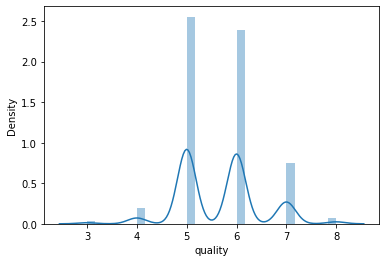

In [35]:
sns.distplot(winedata['quality'])

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality'>

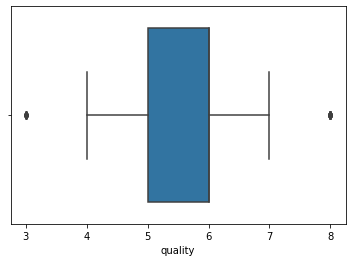

In [36]:
sns.boxplot(winedata['quality'])

In [37]:
upper_limit = winedata['quality'].quantile(0.99)
lower_limit = winedata['quality'].quantile(0.01)

In [38]:
print('Upper Limit = ',upper_limit)
print('Lower Limit = ',lower_limit)

Upper Limit =  8.0
Lower Limit =  4.0


In [39]:
Outlier = winedata[(winedata['quality'] >= 8.0) | (winedata['quality'] <=3)]

In [40]:
Outlier.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.52,0.86,12.8,8.0
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.52,0.82,12.6,8.0
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.52,0.82,12.9,8.0
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,3.52,0.82,9.8,8.0
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.52,0.69,13.4,8.0


In [41]:
Outlier.shape

(28, 12)

In [42]:
Outlier['quality'].value_counts()

8.0    18
3.0    10
Name: quality, dtype: int64

Excellent wine = 18

Poor wine = 10

<AxesSubplot:xlabel='quality', ylabel='Count'>

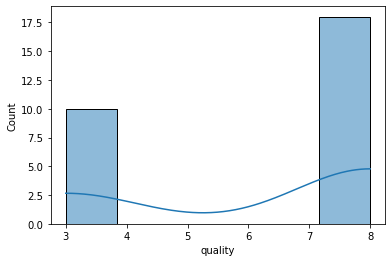

In [43]:
sns.histplot(x='quality',data = Outlier,kde=True,bins =6)

<AxesSubplot:xlabel='quality', ylabel='Count'>

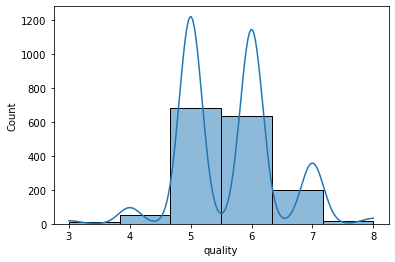

In [44]:
sns.histplot(x='quality',data = winedata,kde=True,bins =6)

# K Nearest Neighbor Classification:

In [50]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [45]:
winedata = winedata.replace([3.0,4.0],0)
winedata = winedata.replace([5.0,6.0],1)
winedata = winedata.replace([7.0,8.0],2)

# Assigning a label to our quality variable
label_quality = LabelEncoder()


# Now changing our dataframe to reflect our new label
winedata['quality'] = label_quality.fit_transform(winedata['quality'])

In [46]:
winedata.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,2.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,2.0
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,1.0


In [47]:
winedata['quality'].value_counts()

1.0    1316
2.0     217
0.0      63
Name: quality, dtype: int64

In [63]:
winedata.shape

(1596, 12)

In [48]:
Y = winedata.quality
X = winedata.drop('quality', axis=1)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [52]:
#Feature Scaling
# from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
 #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [58]:
 print('K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))

K Nearest Neighbor Training Accuracy: 0.9043887147335423
